<a href="https://colab.research.google.com/github/muguro/Kenya-RTA-NLP/blob/main/Data_RTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA SCRAPPING FROM TWITTER W/h SNSCRAPE
The code extracts data from twitter user, in this case either @Ma3Route account or #KenyanTraffic twitter handle is used 

In [ ]:
!pip install snscrape

In [ ]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.3 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
# import snscrape.modules.twitter as sntwitter

import time

import os
import re
import gensim
import gensim.corpora as corpora
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# import tomotopy as tp
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from matplotlib import pyplot as plt

The data is saved in Google colab incrementally, incase there is termination of service, we can resume from previous log

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

query = "(from:ma3route) until:2013-06-20 since:2010-01-01"
tweets = []
limit = 500000

counter = 1
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    tweets.append([tweet.date, tweet.username, tweet.content])
    df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
    path = f"/content/drive/MyDrive/Research Projects/Traffic Research /Twint Data/FinalTrafficData-{counter}.pkl"
    df.to_pickle(path, compression='infer', protocol=5)
    
       


Remeber to save the data as one file format 
-->FinalTrafficData-1.pkl, FinalTrafficData-2.pkl, FinalTrafficData-3.pkl, FinalTrafficData-3.pkl
Merge to 
FinalTrafficData.pkl

### Data processing

The saved log was until July 2021,

If you perform an updated scrapping, the size of the acquired data might be different

In [ ]:
# /content/drive/MyDrive/Research Projects/Traffic Research /Twint Data
all_path = '/content/drive/MyDrive/Research Projects/Traffic Research /Twint Data/FinalTrafficData.pkl'

all_df = pd.read_pickle(all_path)
all_df.shape


(976247, 3)

In [ ]:
new_df=all_df
new_df.head()

,date,time,tweet
1,2021-07-07,09:41:33,@Sir_Labz @Ma3Route @KenyanTraffic Is that bik...
2,2021-07-07,08:08:55,@KenyanTraffic @sikikasafety Both
3,2021-07-07,05:39:00,@KenyanTraffic @sikikasafety 2
4,2021-07-07,04:27:06,@KenyanTraffic #Magicalkenya
5,2021-07-07,04:23:53,@KenyanTraffic @KURAroads @gndiritu @ellyabrah...


In [ ]:
DD = pd.to_datetime(new_df['date'] + ' ' + new_df['time'])
new_df['Datetime'] = DD
new_df = new_df.drop('date', 1)
new_df = new_df.drop('time', 1)
new_df.shape


<ipython-input-8-da2367ae9625>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = new_df.drop('date', 1)
<ipython-input-8-da2367ae9625>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = new_df.drop('time', 1)


(976247, 2)

In [ ]:
STOPWORDS = stopwords.words("english")
len(STOPWORDS)
STOPWORDS.append('isng')
STOPWORDS.append('be')
STOPWORDS.append('uit')
STOPWORDS.append('do')
STOPWORDS.append('amp')
STOPWORDS.append('min')
STOPWORDS.append('mins')
STOPWORDS.append('ni')
STOPWORDS.append('st')
STOPWORDS.append('na')
STOPWORDS.append('n')
STOPWORDS.append('go')
STOPWORDS.append('let')
STOPWORDS.append('bu')
STOPWORDS.append('u')
STOPWORDS.append('c')
STOPWORDS.append('ya')
STOPWORDS.append('wa')
STOPWORDS.append('kwa')

len(STOPWORDS)

# nltk.download('wordnet')
# STOPWORDS = stopwords.words("english")

198

In [ ]:
custom_stopwords = ['ma3route','kenyantraffic', 'maroute','mainaandkingangi', 'rt','gt', 'via','kph', 
                    'ma3routecheck', 'maroutecheck', 'magicalkenya', 'chloride', 'chlorideexide', 'exide']
new_words=('two', 'min', 'amp', 'do',
          'mins', 'kwa' 'kwani', 'wapi', 'na', 'nani',
           'si', 'sisi', 
           'n', 'u', 'go', 'let', 'bu', 'km', 'h', 'k',
           'pm', 'am',  'btw', 'ya', 'ni','nini',
           'hrs','hr', 'btwn','arnd','frm',
           'kuna', 'iko', 'wako','ata','uko','ako','apo',
           'sio','hio','ati','hii','pia', 'nkt', 'lol','smh'
          )

len(new_words)

45

In [ ]:
for i in new_words:
    STOPWORDS.append(i)
len(STOPWORDS)

243

In [ ]:
locs = [
    'airtel', 'abc', 'aboretum', 'accra', 'aerodrome', 'afya', 'aga khan', 'agha khan','aghakhan', 
    'allsop', 'allsops', 'alsops', 'adams arcade', 'arcade', 'arthi river', 'arwings', 'arwings kodhek','argwings kodhek', 'athi river', 
    'buruburu', 'buru','barrack','babadogo', 
    'baraka', 'bellevue', 'blue post', 'bluepost', 'bomas', 'bunyala', 'bus terminus', 'cabana', 'cabanas', 'canivore', 
    'capital center', 'capital centre', 'carnivore', 'cbd', 'chiromo', 'church road', 'city stadium', 
    'clay works', 'dagoretti market', 'dagoretti', 'dandora', 'daystar', 'delmonte', 'dod', 'donholm', 'doni', 'drive in', 'dubois', 
    'eastern bypass', 'eastleigh', 'embakasi', 'enterprise', 'forest', 'gaberone', 'gachie', 'garden city', 'garissa', 
    'gataka', 'gateway mall', 'gatundu', 'gichuru', 'gigiri', 'gitanga', 'githurai', 'githurai45', 'globe', 'globe cinema', 
    'gm', 'gpo', 'grogon', 'gsu', 'guru nanak', 'haile selasie', 'haile selassie', 'haille selassie', 'hamsa', 'hamza', 
    'harambee', 'highrise', 'homeland', 'hurlingham', 'imara daima', 'inda', 'industrial area', 'james gichuru', 'jamhuri', 
    'jamuhuri', 'jericho', 'jkia', 'jogoo', 'juja', 'k west', 'kabete', 'kabiria', 'kagundo', 'kagundo',
     'kahawa sukari', 'kahawa west', 'kahawa','kamiti', 'kangemi', 'kangudo', 'kangundo', 'karen', 'kariobangi', 
    'kasarani', 'kawangware', 'kayole', 'kca', 'kencom', 'kenol', 
     'kenyatta hospital', 'kenyatta road', 'kenyatta university', 'kenyatta way', 'kenyatta road','kenyatta',
    'kiambu', 'kianda', 'kiangombe', 'kibra', 'kikuyu', 'kileleshwa', 'kilimani', 'kimathi', 'kingara', 'kinoo', 
    'kinungi', 'kipande', 'kirinyaga', 'kisumu', 'kitengela', 'knh', 'kodhek', 'koja', 'komarock', 'konja', 
    'konza junction', 'kws', 'lavington', 
    'ladhie', 'ladhies', 'laico', 'landhies', 'landhis', 'landie', 'landies', 
    'langata', 'lenana', 'likoni', 'limuru', 'lunga', 'lungalunga', 'lusaka', 'luthuli', 'machakos', 
    'madaraka', 'magadi', 'mai mahiu', 'makadara', 'makindu', 'manyanja', 'mathai', 'mathare', 'mbagathi', 
    'mlolongo', 'moi', 'mombasa', 'muhoho', 'murang', 'muranga', 'murunga', 'museum', 'muthaiga', 'muthithi', 
    'muthurwa', 'mutindwa', 'mwiki', 'nation center', 'nation centre', 'nairobi', 'naivasha', 'nakuru', 'namanga', 'ndenderu', 'ngara', 'ngong', 'nhif',
     'nyayo stadium', 'nyayo highrise','nyayo','nyerere', 
    'ongata rongai','ojijo', 'ole sereni', 'othaya', 'outering', 'outerring', 'outtering', 
    'pango', 'pangani', 'parkland', 'parklands', 'parliament road', 'peponi', 'pipeline', 'pumwani', 'rabai', 'racecourse', 
    'railways', 'redhill', 'regency', 'riara', 'ring road', 'river road', 'roaster', 'roasters', 'ronga', 'rongai', 'rounda', 
    'roundabout', 'roysambu', 'ruai', 'ruiru', 'runda', 'saika','safari park', 'safaricom', 'salgaa', 'sarit center', 
    'selassie', 'serena hotel', 'simba cement', 'slip road', 'south b', 'south c', 'southb', 'southc', 'southern bypass', 'bypass',
    'st peters', 'stage mpya', 'state house', 'statehouse', 'survey', 'syokimau', 'syokimau', 'tajmall', 
    'thika highway', 'thika', 'tmall', 'tom mboya', 'trm', 'uhuru', 'uhuruhighway', 'umoja', 'university way', 'uon', 
    'upper hill', 'upperhill', 'usiu', 'utalii', 'utawala', 'utawala', 'uthiru', 'uthiru', 'valley road', 'village market',
    'voi',  'wanyee','waiyaki way','waiyaki', 'waiyakiway', 'wendani', 'westie', 'westland', 'westlands', 'westy', 'wilson airport', 
    'witeithie', 'woodlands', 'yaya center','yaya centre','yaya', 'ymca', 'zambezi', 'zimmerman',
    'francis atwoli', 'waithaka','muthama', 'majengo','gikomba','shauri moyo', 'stima plaza',
    'balozi','hazina','madaraka', 'strathmore','makadara','soweto','ayany','woodley',
    'utawala', 'fedha', 'pipeline', 'njiru','kamulu','joska','malaa','kantafu',
    'eabl','ngumba','riverside','gachie','gichagi', 'bomas', 
]
# locs.sort()

len(locs)

319

In [ ]:

dit = {'twn': 'town', 
       'tao': 'town', 
       'ave': 'avenue', 
       'nrb': 'nairobi', 
       'rd': 'road',  
       'msa': 'mombasa', 
       'mba': 'mombasa', 
       'mbsa': 'mombasa',
      'mat': 'matatu', 
       'mats': 'matatu',  
       'matatus': 'matatu', 
       'matatuatu': 'matatu', 
       'matatuatus': 'matatu', 
       'nyweee': 'clear', 
       'nywee': 'clear',
       'thka': 'thika', 
       'thikaroad': 'thika road',
       'momombasasa': 'mombasa',
      }

def replace_words(s, words):
    s = s.lower()
    for k, v in words.items():
        s = s.replace(k, v).strip()
    return s



In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocess_tweet = tweet.lower().strip()
    preprocess_tweet = re.sub(r'\d+', '', preprocess_tweet)
    preprocess_tweet = " ".join(re.sub("([0-9][0-9]:+[0-9][0-9 \t])", " ", preprocess_tweet).split())
    preprocess_tweet = " ".join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z_ \t])|(\w+:\/\/\S+)"," ", preprocess_tweet).split())
    preprocess_tweet = " ".join(word for word in preprocess_tweet.split() if word not in STOPWORDS)
    preprocess_tweet = " ".join(word for word in preprocess_tweet.split() if word not in custom_stopwords)
#     preprocess_tweet = " ".join(Word(word).lemmatize() for word in preprocess_tweet.split())
    preprocess_tweet = re.sub('\s+', ' ', preprocess_tweet).strip()
#     preprocess_tweet = tknzr.tokenize(preprocess_tweet)
    return (preprocess_tweet)

new_df['Processed'] = new_df['tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
new_df.head()

,tweet,Datetime,Processed
1,@Sir_Labz @Ma3Route @KenyanTraffic Is that bik...,2021-07-07 09:41:33,bike realistic alternative really
2,@KenyanTraffic @sikikasafety Both,2021-07-07 08:08:55,
3,@KenyanTraffic @sikikasafety 2,2021-07-07 05:39:00,
4,@KenyanTraffic #Magicalkenya,2021-07-07 04:27:06,
5,@KenyanTraffic @KURAroads @gndiritu @ellyabrah...,2021-07-07 04:23:53,standard safety first besides safety barriers ...


In [ ]:
new_df = new_df[['Datetime', 'tweet', 'Processed']]

new_df.head()

,Datetime,tweet,Processed
1,2021-07-07 09:41:33,@Sir_Labz @Ma3Route @KenyanTraffic Is that bik...,bike realistic alternative really
2,2021-07-07 08:08:55,@KenyanTraffic @sikikasafety Both,
3,2021-07-07 05:39:00,@KenyanTraffic @sikikasafety 2,
4,2021-07-07 04:27:06,@KenyanTraffic #Magicalkenya,
5,2021-07-07 04:23:53,@KenyanTraffic @KURAroads @gndiritu @ellyabrah...,standard safety first besides safety barriers ...


In [ ]:
new_df.tweet[2]

'@KenyanTraffic @sikikasafety Both'

In [ ]:
new_df['Processed'] = new_df['Processed'].apply(lambda x: replace_words(x, dit))
new_df.shape

(976247, 3)

In [ ]:
new_df = new_df[~new_df['Processed'].str.contains(r'today traffic updates')]
new_df = new_df[~new_df['Processed'].str.contains(r'dialabattery')]
new_df['length'] = new_df.Processed.str.len()
new_df = new_df[new_df.length > 9]
new_df = new_df.drop('length', 1)
new_df.shape

<ipython-input-18-9aaf2ad337e2>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = new_df.drop('length', 1)


(886112, 3)

In [ ]:
def locate_tweets(tweet, refs):
    tweet = tweet.lower().strip()
    loc_tweet =[]
    for i in refs:
        if i in tweet:
            loc_tweet.append(i)

    return (loc_tweet)

# clean_tweets(dff.Processed[16], 'rd', 'road')
new_df['location'] = new_df['Processed'].apply(lambda x: locate_tweets(x, locs))
new_df['location'][:10]

1                   []
5                   []
6     [francis atwoli]
7                   []
10               [voi]
11           [mombasa]
12                  []
13                  []
14                  []
15                  []
Name: location, dtype: object

In [ ]:
remove_loc = []
remove_loc = locs
place_words = ('kenya','kenyan', 'kenyans','nairobian',
               'nairobians', 'kanairo','airport','avenue',
               'road', 'rd', 'ave', 'lane',
               'highway','expressway','superhighway',
               'hotel','mall','bridge','flyover','junction',
                'tower',
               'momombasasa', 'interchange',
               'underpass', 'junction', 'stage', 'petrol station','mountain', 'superhigh', 'school',
               'town','bypass',  'route', 'dual carriage',
               'mortuary',
              )



for i in place_words:
    remove_loc.append(i)
len(remove_loc)


354

In [ ]:
def remove_location_tags(tweet, location):
    dloc_tweet = tweet.lower()
    for loc in location:
        if dloc_tweet.find(loc) !=-1:
            dloc_tweet = dloc_tweet.replace(loc, '').strip().strip()
    return dloc_tweet

def remove_locs(tweet, locations):
    loc_tweet = tweet.lower()
#     loc_tweet = " ".join(word for word in preprocess_tweet.split() if word not in locations)
    loc_tweet.str.strip().strip()

    return (loc_tweet)

new_df['Processed'] = new_df['Processed'].apply(lambda x: remove_location_tags(x, remove_loc))

new_df['length'] = new_df.Processed.str.len()
new_df = new_df[new_df.length > 5]
new_df.shape
new_df = new_df.drop('length', 1)
new_df['Processed'][:5]



<ipython-input-21-f63073c7d40e>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = new_df.drop('length', 1)


1                     bike realistic alternative really
5     standa safety first besides safety barriers sa...
6     kwani   ngapi  even confuse google bing maps n...
7                              second time short period
10    kbc anchor trying ad oncoming lorry rolled cli...
Name: Processed, dtype: object

In [ ]:
new_df.shape

(873347, 4)

In [ ]:
accident = ['accident', 'collision', 'hit run', 'hit n run', 'hit and run','injured', 'injuries', 
            'dead', 'fatal', 'lost life', 'tyre burst','perished', 'knocked', 'head on','overturned',
           'run over', 'crash','crashed', 'knocked down', 'injure']

traffic = ['traffic jam', 'traffic','snarl', 'congestion',  'jam', 'deadlock', 'bumper', 'bumpa',
           'breakdown', 'fire',  'clear', 'deadlock', 'gridlock', 'parking', 'standstill',
            'moving', 'slowing']

robbery = ['crime', 'thieves', 'vandalism', 'vandalize', 'mugging', 'snatch', 'carjacker', 
              'robber', 'thief', 'rob','thugs', 'pickpocket','rioting', 'protests','terrorist']

infrust = ['infrastructure', 'road work', 'potholes', 'dump', 'lane block', 'barricade', 'construction','street light' 
           'rail guard', 'guard rail', 'bumps', 'bump','markings', 'signage', 'kerbs']

# safety = ['caution', 'safely', 'visibility', 'fog', 'mist', 'seat belt', 'helmet', 'buckle'
#           'showers', 'rain']

policing = ['cop', 'cops','police', 'karao' ,'askari', 'ntsa',
          'ocpd', 'inspection', 'makarao', 'arrest', 'officer', 'authorities', 
          'patrol', 'commander']

corrupt = ['bribe', 'bribes','collect money', 'extortion', 'cash collection', 'kitu kidogo', 'hongo']

psv = ['psv', 'psvs',  'uber', 'taxi','bus', 
       'boda', 'bodas','bodaboda', 'nduthi', 'motorcycle', 'motorbike', 'rider','pikipiki','tuk tuk','tuktuk', 
       'matatus', 'matatu','mat', 'ma3', 'matatuatu', 'matatuatus','nganya', 'sacco']


reckless = ['overspeed','over speed', 'madness', 'mad driver', 'crazy driver', 'carelessness', 'careless', 'speeding', 
          'overload','overloading', 'reckless', 'drunk drive', 'drunkard', 'drunk driving', 
            'wreckless', 'overlap', 'overlapping']

In [ ]:
def identify_topic(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag = 1
    return flag


new_df['traffic'] = new_df['Processed'].apply(lambda x: identify_topic(x, traffic))
new_df['robbery'] = new_df['Processed'].apply(lambda x: identify_topic(x, robbery))
new_df['infrust'] = new_df['Processed'].apply(lambda x: identify_topic(x, infrust))
new_df['reckless'] = new_df['Processed'].apply(lambda x: identify_topic(x, reckless))
new_df['policing'] = new_df['Processed'].apply(lambda x: identify_topic(x, policing))
new_df['corrupt'] = new_df['Processed'].apply(lambda x: identify_topic(x, corrupt))
new_df['accident'] = new_df['Processed'].apply(lambda x: identify_topic(x, accident))
new_df['psv']  =   new_df['Processed'].apply(lambda x: identify_topic(x, psv))


new_df.loc[:, 'other'] = 1
new_df.loc[(new_df.traffic == 1)  | (new_df.robbery == 1) | (new_df.infrust == 1) | 
       (new_df.policing == 1) | (new_df.corrupt == 1)    | (new_df.psv == 1)     |
       (new_df.accident == 1) | (new_df.reckless == 1), 'other'] = 0


new_df.shape

(873347, 13)

In [ ]:
new_df.columns.tolist()[4:]

['traffic',
 'robbery',
 'infrust',
 'reckless',
 'policing',
 'corrupt',
 'accident',
 'psv',
 'other']

['TRAFFIC', 'ROBBERY', 'INFRUST', 'RECKLESS', 'POLICING', 'CORRUPT', 'ACCIDENT', 'PSV', 'OTHER']


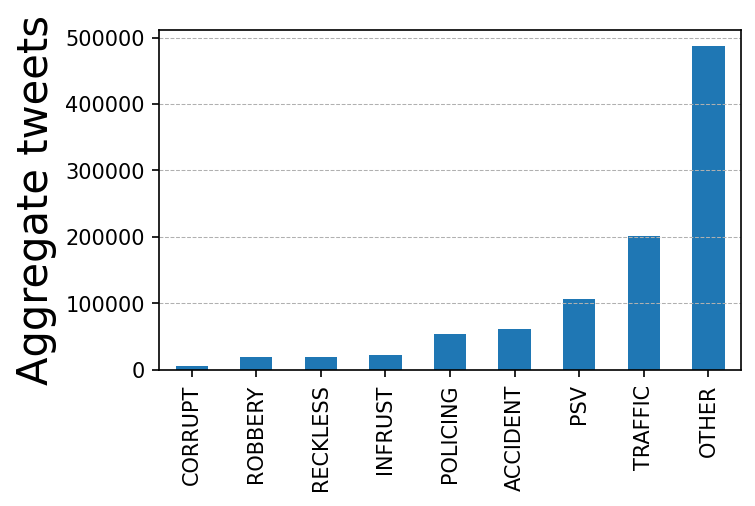

In [ ]:
LABEL_COLUMNS = new_df.columns.tolist()[4:]
print([x.upper() for x in LABEL_COLUMNS])
fig = plt.figure(figsize=(10,7), dpi=150)
new_df[LABEL_COLUMNS].sum().sort_values().plot(kind="bar", figsize=(5, 3));
plt.ylabel('Aggregate tweets', fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=.5)


ylabels = ['CORRUPT','ROBBERY','RECKLESS','INFRUST','POLICING','ACCIDENT','PSV','TRAFFIC',  'OTHER']


plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ylabels) 

plt.savefig('DataAggregate.png', bbox_inches='tight')

In [ ]:
new_df[LABEL_COLUMNS].sum().sort_values()

corrupt       5617
infrust      18724
robbery      19435
reckless     21389
accident     54004
policing     61189
psv         106006
traffic     201220
other       487642
dtype: int64

In [ ]:
speeder = ['speed trap','speeding trap', 'speed camera', 'speed cameras', 'cameras', 'speed crackdown']
new_df['speeder'] = new_df['Processed'].apply(lambda x: identify_topic(x, speeder))

In [ ]:
traffic = new_df[new_df.traffic == 1]
robbery = new_df[new_df.robbery == 1]
infrust = new_df[new_df.infrust == 1]
reckless = new_df[new_df.reckless == 1]
police = new_df[new_df.policing == 1]
corrupt = new_df[new_df.corrupt == 1]
accident = new_df[new_df.accident==1]
psv = new_df[new_df.psv==1]
other = new_df[new_df.other == 1]
speed_warn = new_df[new_df.speeder == 1]

In [ ]:

# Save all data except other category
all_df = new_df[new_df['other']==0]
# all_df.to_pickle("/content/drive/MyDrive/Traffic Research /Twint Data/AllCleanedData.pkl")
# all_df.to_csv("CleanData.csv")
all_df.shape

(385705, 14)

In [ ]:
all_df.head()

,Datetime,tweet,Processed,location,traffic,robbery,infrust,reckless,policing,corrupt,accident,psv,other,speeder
5,2021-07-07 04:23:53,@KenyanTraffic @KURAroads @gndiritu @ellyabrah...,standa safety first besides safety barriers sa...,[],0,0,0,0,0,0,0,1,0,0
11,2021-07-07 02:56:55,: whats happening on mombasa road its been hr ...,whats happening moving,[mombasa],1,0,0,0,0,0,0,0,0,0
15,2021-07-07 02:50:17,"@KenyanTraffic @keru_mo So, I was turning left...",turning left indicated way back slowed ensurin...,[],0,0,0,0,0,0,0,1,0,0
19,2021-07-07 02:38:55,: @AddiJmz Another rider caused head on collis...,another rider caused head collision northern ...,[bypass],0,0,0,1,0,0,1,1,0,0
20,2021-07-07 02:34:07,@FrankKamau @Paulondeng @KenyanTraffic Does he...,front bumper gh impreza,[],1,0,1,0,0,0,0,0,0,0


In [ ]:
MonthlyData = all_df.groupby(pd.Grouper(key='Datetime',freq='Q'))['traffic','infrust','robbery', 'reckless', 'policing', 'accident', 'psv', 'corrupt'].sum()

# MonthlyData.to_csv('/content/drive/MyDrive/Traffic Research /Twint Data/MonthlyData.csv')
MonthlyData

<ipython-input-30-f656dce73222>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MonthlyData = all_df.groupby(pd.Grouper(key='Datetime',freq='Q'))['traffic','infrust','robbery', 'reckless', 'policing', 'accident', 'psv', 'corrupt'].sum()


,traffic,infrust,robbery,reckless,policing,accident,psv,corrupt
Datetime,,,,,,,,
2015-03-31,13771,826,748,951,2586,2740,3752,147
2015-06-30,12552,745,520,842,1975,2395,3011,96
2015-09-30,8595,536,422,569,1843,2143,2440,147
2015-12-31,8840,480,342,561,1525,1897,2264,74
2016-03-31,9522,645,422,768,2018,2160,2902,125
2016-06-30,9813,671,534,812,2071,2198,3187,126
2016-09-30,7611,515,473,965,2183,2388,3387,141
2016-12-31,8276,702,458,925,1925,2060,3232,117
2017-03-31,8118,642,463,874,1888,1890,3170,177


In [ ]:
MonthlyData['time'] = pd.to_datetime(MonthlyData.index)
MonthlyData.time

Datetime
2015-03-31   2015-03-31
2015-06-30   2015-06-30
2015-09-30   2015-09-30
2015-12-31   2015-12-31
2016-03-31   2016-03-31
2016-06-30   2016-06-30
2016-09-30   2016-09-30
2016-12-31   2016-12-31
2017-03-31   2017-03-31
2017-06-30   2017-06-30
2017-09-30   2017-09-30
2017-12-31   2017-12-31
2018-03-31   2018-03-31
2018-06-30   2018-06-30
2018-09-30   2018-09-30
2018-12-31   2018-12-31
2019-03-31   2019-03-31
2019-06-30   2019-06-30
2019-09-30   2019-09-30
2019-12-31   2019-12-31
2020-03-31   2020-03-31
2020-06-30   2020-06-30
2020-09-30   2020-09-30
2020-12-31   2020-12-31
2021-03-31   2021-03-31
2021-06-30   2021-06-30
2021-09-30   2021-09-30
Freq: Q-DEC, Name: time, dtype: datetime64[ns]

TypeError: ignored

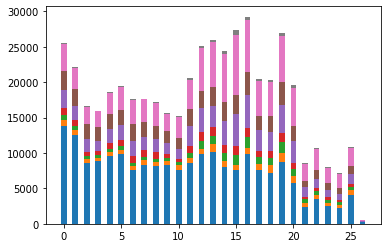

In [ ]:
# col = MonthlyData.columns.tolist()
# MonthlyData.index = pd.to_datetime(MonthlyData.index)
ax = MonthlyData.plot.bar(stacked=True)


In [ ]:
# MonthlyData.drop(MonthlyData.tail(1).index,inplace=True) # drop last n rows
stat = MonthlyData.describe()
stat

,traffic,infrust,robbery,reckless,policing,accident,psv,corrupt
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7452.592593,693.481481,719.814815,792.185185,2266.259259,2000.148148,3926.148148,208.037037
std,3176.828865,243.915554,394.695310,348.064653,1096.344822,754.199306,1986.978876,149.680553
min,210.000000,33.000000,33.000000,27.000000,87.000000,60.000000,144.000000,11.000000
25%,6478.000000,547.500000,440.000000,531.000000,1431.000000,1617.000000,2482.000000,113.000000
50%,8118.000000,694.000000,534.000000,842.000000,2018.000000,2143.000000,3187.000000,141.000000
75%,9181.000000,806.000000,1047.500000,965.000000,2931.000000,2481.500000,5197.500000,277.000000
max,13771.000000,1197.000000,1537.000000,1310.000000,4702.000000,3153.000000,8558.000000,626.000000


### SENTIMENT ANALYSIS

In [ ]:
!pip install transformers

In [ ]:
import torch
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

In [ ]:
dev = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
BERT_MODEL_NAME = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME, device='cuda')
bert_model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME)
bert_model = bert_model.to(dev)

In [ ]:
def sent_score(tweet):
    token = tokenizer.encode(tweet, return_tensors='pt')
    res = bert_model(token.to(dev))
    scores = softmax(res[0][0].detach().cpu().numpy())
    return(np.argmax(scores) - 1)
#     return(scores[0],scores[1], scores[2] )
#     return int(torch.argmax(res.logits))
sent_score('Mombasa is worse apart bus stalled capital centre inbound avoid by all means')

-1

In [ ]:
new_df['sentiment'] = new_df['Processed'].apply(lambda x: sent_score(x))
new_df.head()

KeyboardInterrupt: ignored

In [ ]:
new_df.to_pickle("/content/drive/MyDrive/Traffic Research /Twint Data/FinalProcessedTrafficData_revision.pkl")

In [ ]:
PSV = new_df[new_df['psv'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Police = new_df[new_df['policing'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Corrupt = new_df[new_df['corrupt'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Insecurity = new_df[new_df['insecurity'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Reckless = new_df[new_df['reckless'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Infrastructure = new_df[new_df['infrust'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Accident = new_df[new_df['accident'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()
Traffic = new_df[new_df['traffic'] ==1].groupby(pd.Grouper(key='Datetime',freq='M'))['sentiment'].sum()


Sent_All = pd.concat([PSV, Police,Insecurity, Reckless, Infrastructure, Accident, Traffic], axis=1,
                    keys=['PSV', 'Police', 'Insecurity', 'Reckless', 'Infrastructure', 'Accident', 'Traffic'])
# , 
#                      keys=['PSV', 'Police', 'Insecurity', 'Reckless', 'Infrastructure', 'Accident', 'Traffic'])


Sent_All.to_csv('SentimentALL.csv')
Sent_All